# 1. Importing Necessary Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Loading Dataset

In [2]:
df = pd.read_csv(r"data\sepsis_cohort_features.csv")
df.head()

,subject_id,hadm_id,icustay_id,interval_4h,gender,age,ethnicity,weight,height,heart_rate,...,norepinephrine,dopamine,dobutamine,epinephrine,vasopressin,crystalloids,colloids,mechanical_vent,hours_since_icu_admission,mortality_48h_flag
0,4096,124383,201361,2170-07-21 22:11:06 UTC,M,79,BLACK/AFRICAN AMERICAN,100.450001,NaN,98.0,...,0.0,0.0,0.0,0.0,0.0,40.0,0.0,NaN,28,1
1,6912,143307,298739,2196-09-11 17:51:10 UTC,F,24,WHITE,83.599998,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,260,1
2,87552,117940,251622,2170-08-11 10:41:12 UTC,M,47,WHITE,71.850000,129.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,96,0
3,91648,125521,224948,2180-03-26 00:56:43 UTC,M,72,WHITE,78.961111,120.5,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,408,1
4,28160,184274,206157,2179-02-13 01:14:57 UTC,M,79,WHITE,84.699999,NaN,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,250.0,NaN,88,0


# 3. Basic Dataset Information

In [3]:
df.columns

Index(['subject_id', 'hadm_id', 'icustay_id', 'interval_4h', 'gender', 'age',
       'ethnicity', 'weight', 'height', 'heart_rate', 'map', 'spo2',
       'respiratory_rate', 'temperature', 'systolic_bp', 'diastolic_bp',
       'gcs_total', 'fio2', 'peep', 'lactate', 'creatinine', 'platelets',
       'bun', 'wbc', 'bicarbonate', 'sodium', 'potassium', 'bilirubin',
       'hematocrit', 'glucose', 'pao2', 'ph', 'pco2', 'norepinephrine',
       'dopamine', 'dobutamine', 'epinephrine', 'vasopressin', 'crystalloids',
       'colloids', 'mechanical_vent', 'hours_since_icu_admission',
       'mortality_48h_flag'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662158 entries, 0 to 662157
Data columns (total 43 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   subject_id                 662158 non-null  int64  
 1   hadm_id                    662158 non-null  int64  
 2   icustay_id                 662158 non-null  int64  
 3   interval_4h                662158 non-null  object 
 4   gender                     662158 non-null  object 
 5   age                        662158 non-null  int64  
 6   ethnicity                  662158 non-null  object 
 7   weight                     591282 non-null  float64
 8   height                     207126 non-null  float64
 9   heart_rate                 372693 non-null  float64
 10  map                        264219 non-null  float64
 11  spo2                       263233 non-null  float64
 12  respiratory_rate           69110 non-null   float64
 13  temperature                34

In [5]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
subject_id,662158.0,NaN,NaN,NaN,34775.897774,28555.145413,3.0,12356.0,25076.0,56562.0,99991.0
hadm_id,662158.0,NaN,NaN,NaN,150087.88563,28706.113747,100001.0,125574.0,149686.0,175009.0,199999.0
icustay_id,662158.0,NaN,NaN,NaN,249779.154632,28636.577309,200003.0,224964.0,250198.0,274326.0,299994.0
interval_4h,662158,661900,2161-02-20 14:40:19 UTC,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,662158,2,M,373901,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,662158.0,NaN,NaN,NaN,74.40513,50.326997,17.0,55.0,67.0,78.0,311.0
ethnicity,662158,38,WHITE,471368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,591282.0,NaN,NaN,NaN,250.211635,15566.627375,0.0,68.654545,81.650002,97.411111,2060026.075
height,207126.0,NaN,NaN,NaN,117.743978,9.63009,0.0,113.5,118.5,124.0,310.0
heart_rate,372693.0,NaN,NaN,NaN,92.906584,18.835036,0.0,80.0,91.0,105.0,280.0


In [6]:
# missing values count and percentage
missing_values = df.isnull().sum()
missing_values_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_values_percent
})

missing_df = missing_df.sort_values('Percentage', ascending=False)

# Display columns with missing values
missing_df[missing_df['Missing Values'] > 0]

,Missing Values,Percentage
hematocrit,603893,91.200741
respiratory_rate,593048,89.562914
peep,527265,79.628276
lactate,505223,76.299463
fio2,497458,75.126782
height,455032,68.719550
bilirubin,430572,65.025568
gcs_total,426561,64.419821
spo2,398925,60.246195
map,397939,60.097288


In [7]:
# columns that have no missing values
columns_without_missing = df.columns[df.isnull().sum() == 0]

df_no_missing = df[columns_without_missing]

print(f"\nOriginal DataFrame shape: {df.shape}")
print(f"New DataFrame shape: {df_no_missing.shape}")
df_no_missing.head()


Original DataFrame shape: (662158, 43)
New DataFrame shape: (662158, 16)


,subject_id,hadm_id,icustay_id,interval_4h,gender,age,ethnicity,norepinephrine,dopamine,dobutamine,epinephrine,vasopressin,crystalloids,colloids,hours_since_icu_admission,mortality_48h_flag
0,4096,124383,201361,2170-07-21 22:11:06 UTC,M,79,BLACK/AFRICAN AMERICAN,0.0,0.0,0.0,0.0,0.0,40.0,0.0,28,1
1,6912,143307,298739,2196-09-11 17:51:10 UTC,F,24,WHITE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,260,1
2,87552,117940,251622,2170-08-11 10:41:12 UTC,M,47,WHITE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96,0
3,91648,125521,224948,2180-03-26 00:56:43 UTC,M,72,WHITE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,408,1
4,28160,184274,206157,2179-02-13 01:14:57 UTC,M,79,WHITE,0.0,0.0,0.0,0.0,0.0,0.0,250.0,88,0


In [8]:
df_no_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662158 entries, 0 to 662157
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   subject_id                 662158 non-null  int64  
 1   hadm_id                    662158 non-null  int64  
 2   icustay_id                 662158 non-null  int64  
 3   interval_4h                662158 non-null  object 
 4   gender                     662158 non-null  object 
 5   age                        662158 non-null  int64  
 6   ethnicity                  662158 non-null  object 
 7   norepinephrine             662158 non-null  float64
 8   dopamine                   662158 non-null  float64
 9   dobutamine                 662158 non-null  float64
 10  epinephrine                662158 non-null  float64
 11  vasopressin                662158 non-null  float64
 12  crystalloids               662158 non-null  float64
 13  colloids                   66

In [9]:
df_no_missing.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
subject_id,662158.0,NaN,NaN,NaN,34775.897774,28555.145413,3.0,12356.0,25076.0,56562.0,99991.0
hadm_id,662158.0,NaN,NaN,NaN,150087.88563,28706.113747,100001.0,125574.0,149686.0,175009.0,199999.0
icustay_id,662158.0,NaN,NaN,NaN,249779.154632,28636.577309,200003.0,224964.0,250198.0,274326.0,299994.0
interval_4h,662158,661900,2161-02-20 14:40:19 UTC,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,662158,2,M,373901,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,662158.0,NaN,NaN,NaN,74.40513,50.326997,17.0,55.0,67.0,78.0,311.0
ethnicity,662158,38,WHITE,471368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
norepinephrine,662158.0,NaN,NaN,NaN,0.005492,0.18835,0.0,0.0,0.0,0.0,76.808
dopamine,662158.0,NaN,NaN,NaN,1.635619,17.223746,0.0,0.0,0.0,0.0,1257.3
dobutamine,662158.0,NaN,NaN,NaN,0.00022,0.018853,0.0,0.0,0.0,0.0,13.063484


### Observation
- For missing values, more exploration and domain knowledge is needed before handling it.
- For perfect columns, first exploration will involve univariate analysis.

# Univariate Analysis for df_no_missing

In [10]:
# Converting subject, hadm and icustay to object as they are identifiers for patients
df_no_missing = df[columns_without_missing].copy()

df_no_missing['subject_id'] = df_no_missing['subject_id'].astype('object')
df_no_missing['hadm_id'] = df_no_missing['hadm_id'].astype('object')
df_no_missing['icustay_id'] = df_no_missing['icustay_id'].astype('object')
df_no_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662158 entries, 0 to 662157
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   subject_id                 662158 non-null  object 
 1   hadm_id                    662158 non-null  object 
 2   icustay_id                 662158 non-null  object 
 3   interval_4h                662158 non-null  object 
 4   gender                     662158 non-null  object 
 5   age                        662158 non-null  int64  
 6   ethnicity                  662158 non-null  object 
 7   norepinephrine             662158 non-null  float64
 8   dopamine                   662158 non-null  float64
 9   dobutamine                 662158 non-null  float64
 10  epinephrine                662158 non-null  float64
 11  vasopressin                662158 non-null  float64
 12  crystalloids               662158 non-null  float64
 13  colloids                   66

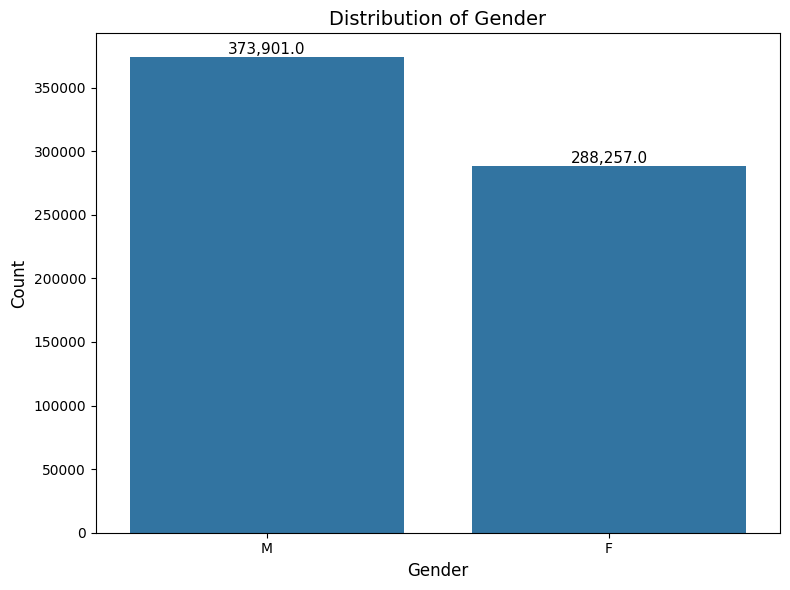

Gender distribution (%):
gender
M    56.467037
F    43.532963
Name: proportion, dtype: float64


In [11]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x='gender', data=df_no_missing)

for p in ax.patches:
    ax.annotate(f'{p.get_height():,}', 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom', fontsize=11)

plt.title('Distribution of Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

gender_counts = df_no_missing['gender'].value_counts(normalize=True) * 100
print("Gender distribution (%):")
print(gender_counts)

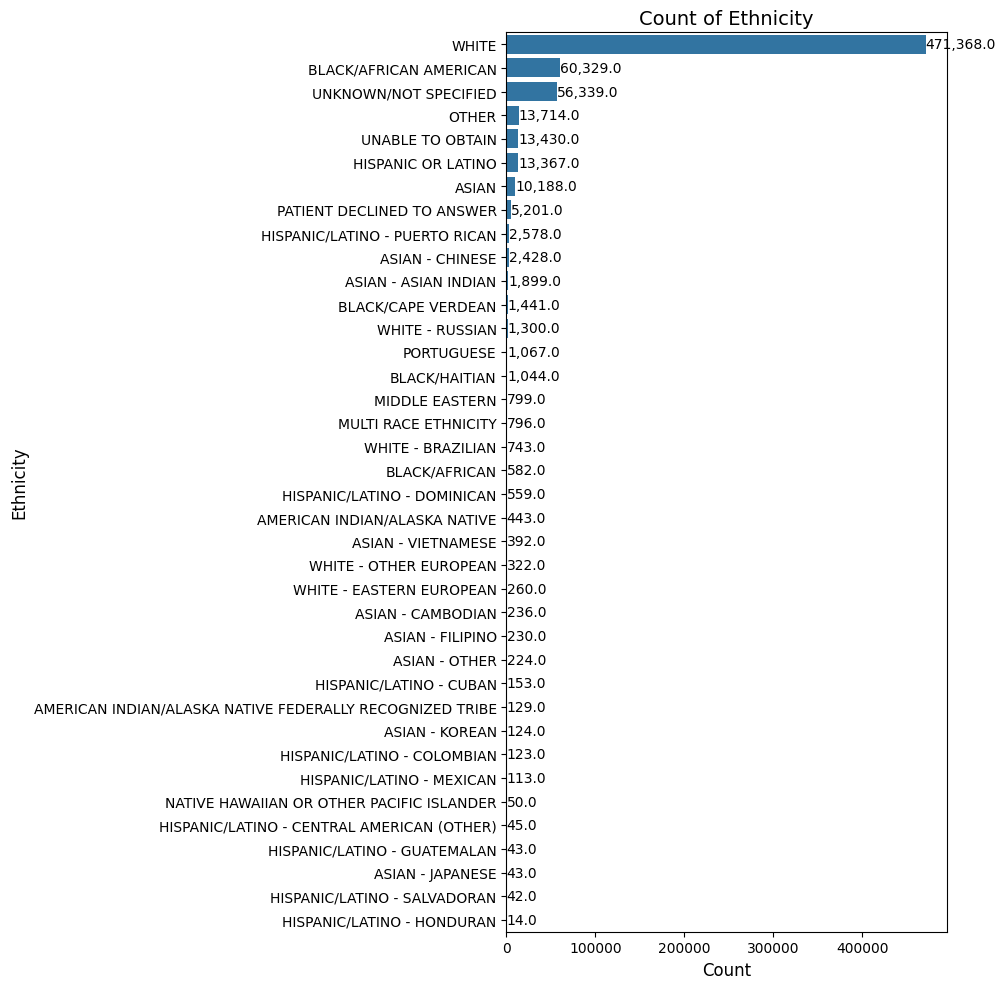

Ethnicity distribution (%):
ethnicity
WHITE                                                       71.186635
BLACK/AFRICAN AMERICAN                                       9.110967
UNKNOWN/NOT SPECIFIED                                        8.508392
OTHER                                                        2.071107
UNABLE TO OBTAIN                                             2.028217
HISPANIC OR LATINO                                           2.018702
ASIAN                                                        1.538606
PATIENT DECLINED TO ANSWER                                   0.785462
HISPANIC/LATINO - PUERTO RICAN                               0.389333
ASIAN - CHINESE                                              0.366680
ASIAN - ASIAN INDIAN                                         0.286790
BLACK/CAPE VERDEAN                                           0.217622
WHITE - RUSSIAN                                              0.196328
PORTUGUESE                                          

In [14]:
plt.figure(figsize=(10, 10))  #

ax = sns.countplot(y='ethnicity', data=df_no_missing, 
                  order=df_no_missing['ethnicity'].value_counts().index)

for p in ax.patches:
    ax.annotate(f'{p.get_width():,}', 
                (p.get_width() + 5, p.get_y() + p.get_height()/2), 
                ha='left', va='center', fontsize=10)

plt.title('Count of Ethnicity', fontsize=14)
plt.ylabel('Ethnicity', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

ethnicity_counts = df_no_missing['ethnicity'].value_counts(normalize=True) * 100
print("Ethnicity distribution (%):")
print(ethnicity_counts)

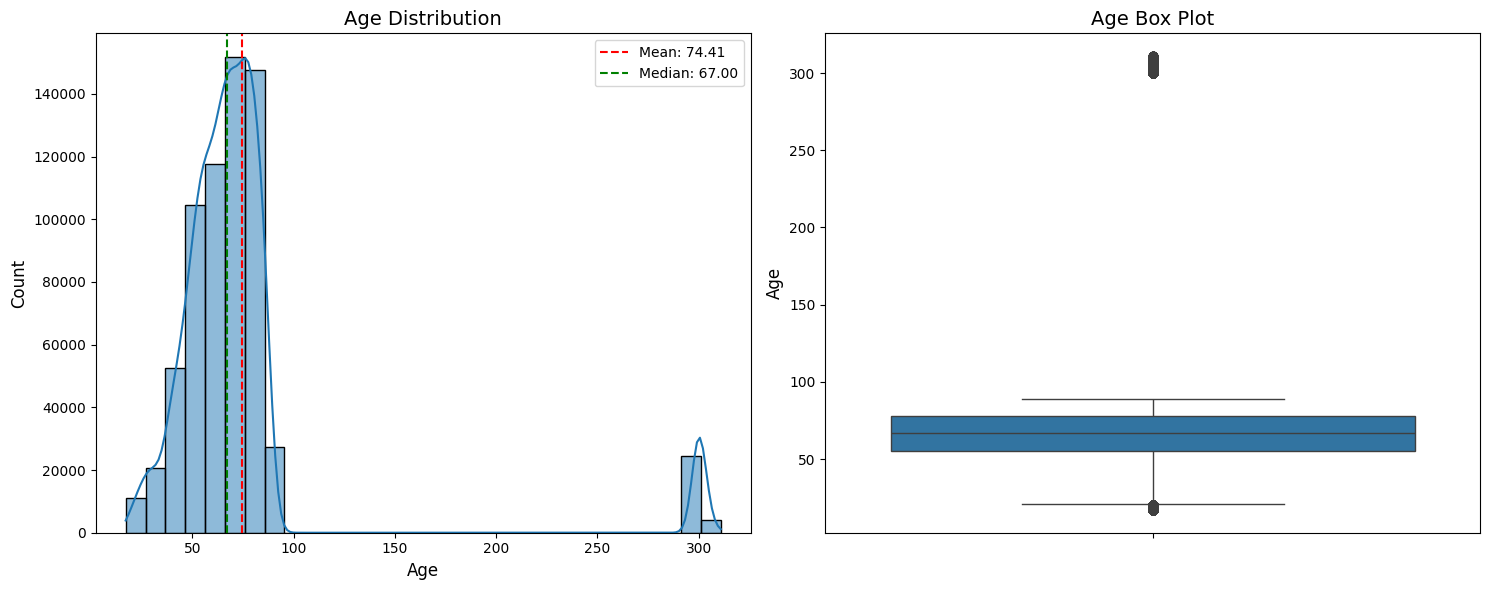

Age tats:
count    662158.000000
mean         74.405130
std          50.326997
min          17.000000
25%          55.000000
50%          67.000000
75%          78.000000
max         311.000000
Name: age, dtype: float64

Age group distribution:
            Count  Percentage (%)
age_group                        
0-18          492        0.077658
19-30       19586        3.091483
31-40       29061        4.587031
41-50       70100       11.064688
51-60      119965       18.935454
61-70      145314       22.936578
71-80      155063       24.475374
81-90       93966       14.831733
91+             0        0.000000


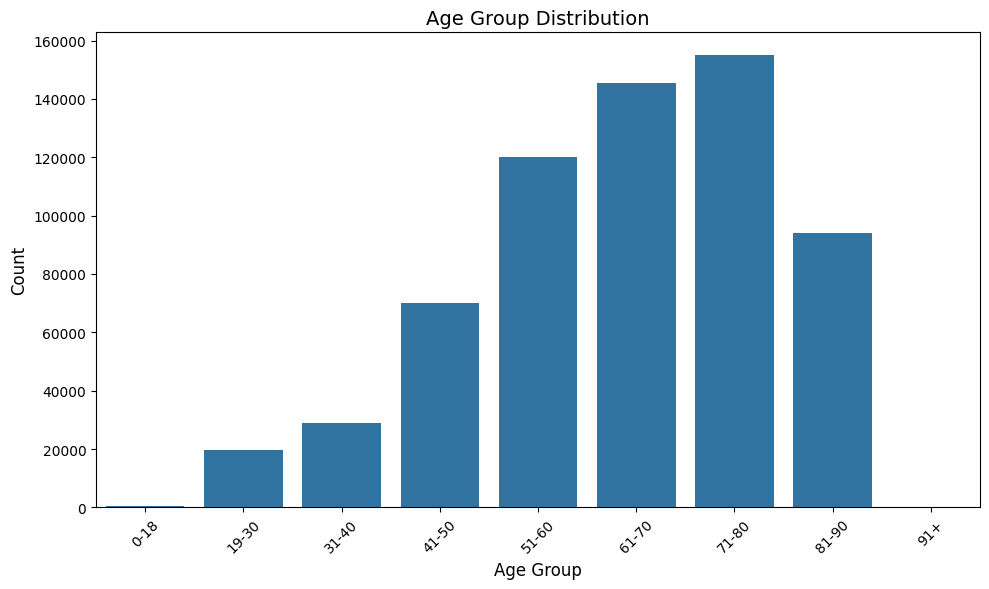

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Histogram with KDE
sns.histplot(df_no_missing['age'], kde=True, bins=30, ax=ax1)
ax1.set_title('Age Distribution', fontsize=14)
ax1.set_xlabel('Age', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)

# mean and median lines
mean_age = df_no_missing['age'].mean()
median_age = df_no_missing['age'].median()
ax1.axvline(mean_age, color='red', linestyle='--', label=f'Mean: {mean_age:.2f}')
ax1.axvline(median_age, color='green', linestyle='--', label=f'Median: {median_age:.2f}')
ax1.legend()

# Box plot
sns.boxplot(y=df_no_missing['age'], ax=ax2)
ax2.set_title('Age Box Plot', fontsize=14)
ax2.set_ylabel('Age', fontsize=12)

plt.tight_layout()
plt.show()

print("Age tats:")
print(df_no_missing['age'].describe())

age_bins = [0, 18, 30, 40, 50, 60, 70, 80, 90, 120]
age_labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91+']
df_no_missing['age_group'] = pd.cut(df_no_missing['age'], bins=age_bins, labels=age_labels)

# Count and percentage by age group
age_group_counts = df_no_missing['age_group'].value_counts().sort_index()
age_group_percent = df_no_missing['age_group'].value_counts(normalize=True).sort_index() * 100

age_distribution = pd.DataFrame({
    'Count': age_group_counts,
    'Percentage (%)': age_group_percent
})

print("\nAge group distribution:")
print(age_distribution)

# Plot age groups
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', data=df_no_missing, order=age_labels)
plt.title('Age Group Distribution', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

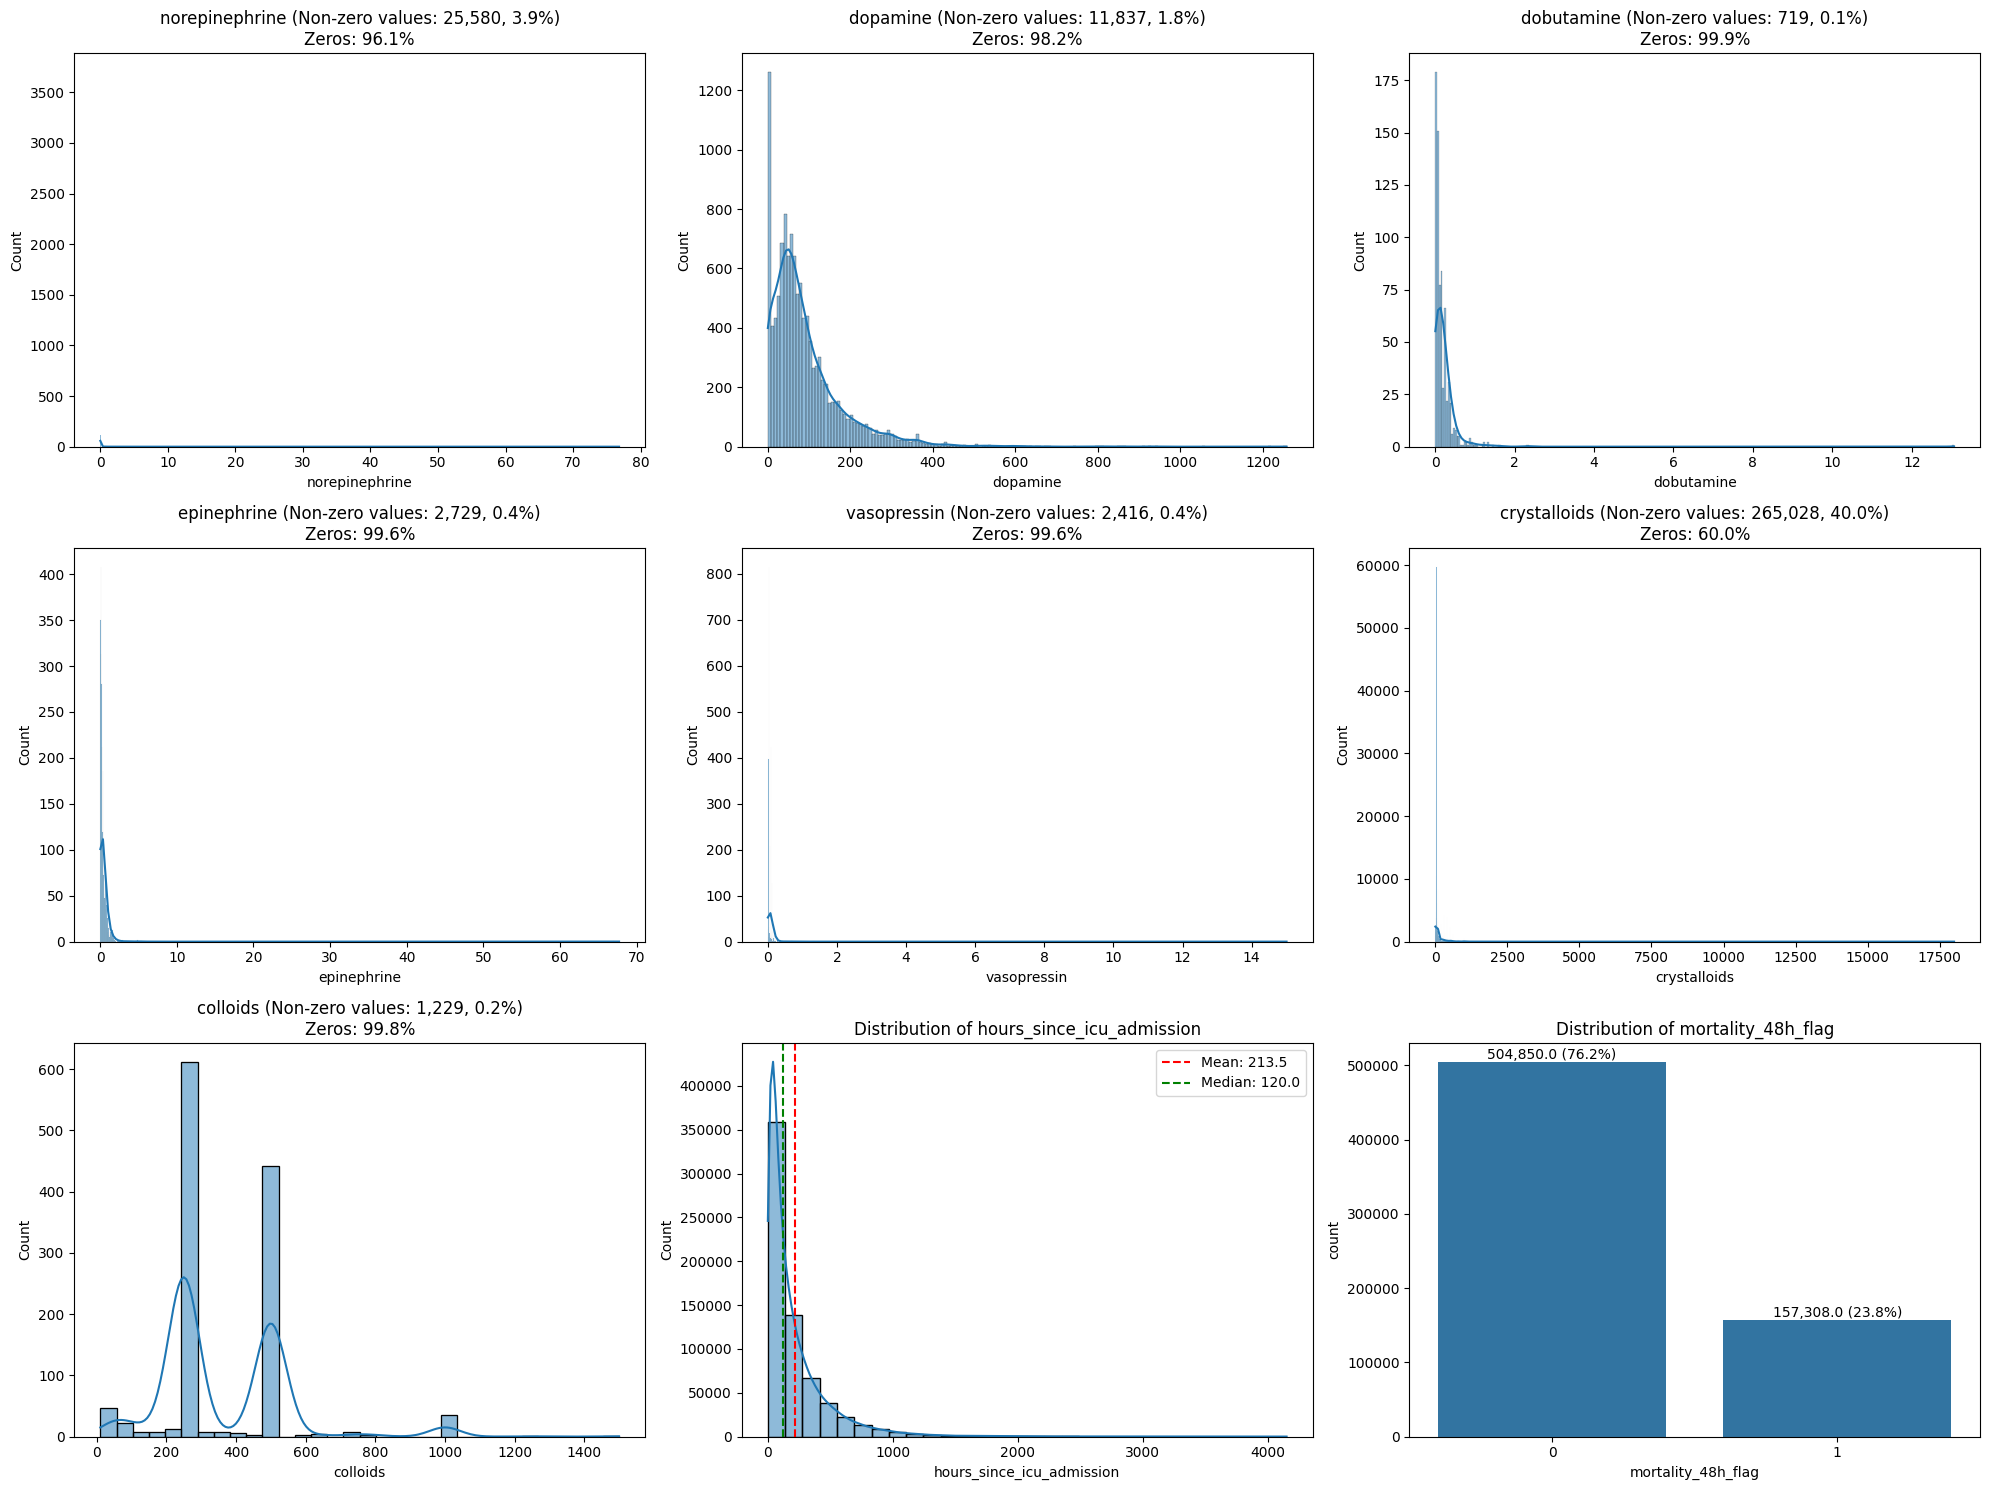

atats

norepinephrine:
Zero values: 636,578 (96.14%)
Non-zero values: 25,580 (3.86%)
Non-zero statistics:
count    25580.000000
mean         0.142155
std          0.948117
min          0.000012
25%          0.001500
50%          0.004167
75%          0.012579
max         76.808000
Name: norepinephrine, dtype: float64

dopamine:
Zero values: 650,321 (98.21%)
Non-zero values: 11,837 (1.79%)
Non-zero statistics:
count    11837.000000
mean        91.495981
std         91.508151
min          0.000058
25%         34.032001
50%         66.240001
75%        120.959998
max       1257.300000
Name: dopamine, dtype: float64

dobutamine:
Zero values: 661,439 (99.89%)
Non-zero values: 719 (0.11%)
Non-zero statistics:
count    719.000000
mean       0.202376
std        0.535548
min        0.005000
25%        0.049775
50%        0.117136
75%        0.250275
max       13.063484
Name: dobutamine, dtype: float64

epinephrine:
Zero values: 659,429 (99.59%)
Non-zero values: 2,729 (0.41%)
Non-zero statistics

In [15]:
columns_to_analyze = [
    'norepinephrine', 'dopamine', 'dobutamine', 'epinephrine', 
    'vasopressin', 'crystalloids', 'colloids', 
    'hours_since_icu_admission', 'mortality_48h_flag'
]

fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()

def zero_percentage(series):
    return (series == 0).mean() * 100

for i, col in enumerate(columns_to_analyze):
    ax = axes[i]
    
    # binary mortality flag
    if col == 'mortality_48h_flag':
        sns.countplot(x=col, data=df_no_missing, ax=ax)
        ax.set_title(f'Distribution of {col}', fontsize=12)
        
        # Calculate & display percentages
        counts = df_no_missing[col].value_counts(normalize=True) * 100
        for j, p in enumerate(ax.patches):
            percentage = counts[j] if j < len(counts) else 0
            ax.annotate(f'{p.get_height():,} ({percentage:.1f}%)', 
                       (p.get_x() + p.get_width()/2., p.get_height()), 
                       ha='center', va='bottom')
    
    # For continuous variables medications
    elif col in ['norepinephrine', 'dopamine', 'dobutamine', 'epinephrine', 'vasopressin', 'crystalloids', 'colloids']:
        # percentage of zeros
        zero_perc = zero_percentage(df_no_missing[col])
        
        # histogram for non-zero values
        non_zero_values = df_no_missing[df_no_missing[col] > 0][col]
        
        if len(non_zero_values) > 0:
            sns.histplot(non_zero_values, ax=ax, kde=True)
            ax.set_title(f'{col} (Non-zero values: {len(non_zero_values):,}, {100-zero_perc:.1f}%)\nZeros: {zero_perc:.1f}%', fontsize=12)
        else:
            ax.text(0.5, 0.5, f'All values are zero', ha='center', va='center')
            ax.set_title(f'{col} (100% zeros)', fontsize=12)
    
    # hours since ICU admission
    else:
        sns.histplot(df_no_missing[col], ax=ax, kde=True, bins=30)
        ax.set_title(f'Distribution of {col}', fontsize=12)
        
        # mean and median lines
        mean_val = df_no_missing[col].mean()
        median_val = df_no_missing[col].median()
        ax.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.1f}')
        ax.axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.1f}')
        ax.legend(fontsize=10)

plt.tight_layout()
plt.show()

print("atats")
for col in columns_to_analyze:
    print(f"\n{col}:")
    if col in ['norepinephrine', 'dopamine', 'dobutamine', 'epinephrine', 'vasopressin', 'crystalloids', 'colloids']:
        print(f"Zero values: {(df_no_missing[col] == 0).sum():,} ({zero_percentage(df_no_missing[col]):.2f}%)")
        print(f"Non-zero values: {(df_no_missing[col] > 0).sum():,} ({100-zero_percentage(df_no_missing[col]):.2f}%)")
        
        # stats for non-zero values
        non_zero = df_no_missing[df_no_missing[col] > 0][col]
        if len(non_zero) > 0:
            print(f"Non-zero statistics:")
            print(non_zero.describe())
    else:
        print(df_no_missing[col].describe())
    
    if col == 'mortality_48h_flag':
        mortality_counts = df_no_missing[col].value_counts(normalize=True) * 100
        print(f"\nMortality rate: {mortality_counts[1]:.2f}%")